<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/10-04-mnist-nn-deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.
# MNIST with NN deep

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

In [3]:
(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

In [5]:
print('x_train.shape:{}\ny_train.shape{}'.format(x_train.shape, y_train.shape))

x_train.shape:(60000, 784)
y_train.shape(60000,)


In [6]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [7]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


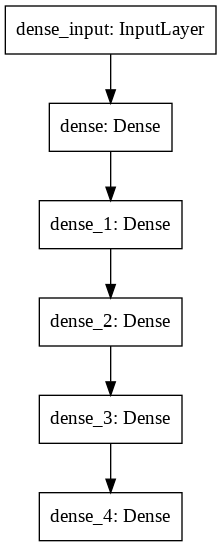

In [8]:
tf.keras.utils.plot_model(tf.model)

In [9]:
tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs, verbose=0)

In [10]:
# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

index:  3757 actual y:  8 predicted y:  8
index:  7304 actual y:  5 predicted y:  5
index:  7300 actual y:  7 predicted y:  7
index:  6039 actual y:  9 predicted y:  9
index:  9429 actual y:  3 predicted y:  3
index:  4420 actual y:  5 predicted y:  5
index:  5507 actual y:  2 predicted y:  2
index:  8809 actual y:  1 predicted y:  1
index:  654 actual y:  5 predicted y:  5
index:  7302 actual y:  8 predicted y:  8


In [11]:
# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1562 - accuracy: 0.9720
loss:  0.1561700999736786
accuracy 0.972000002861023
